# Getting Started

In this project, we will explore text message data and create models to predict if a message is spam or not. We obtained the data set from https://www.kaggle.com/uciml/sms-spam-collection-dataset. This is a **Supervised Text Classification** problem. The dataset can be found in the same directory and includes following features:

-  **v1**- label whether a message is spam or ham
-  **v2**- text message
-  **Unnamed: 2**- Unknown column with null values
-  **Unnamed: 3**- Unknown column with null values
-  **Unnamed: 4**- Unknown column with null values


In [428]:
# importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning 

In [429]:
# reading the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

In [430]:
# first 5 examples of the data set
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [431]:
# Checking for null values in the dataset
data.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

As, we do not need columns 'Unnamed:2', 'Unnamed:3' and 'Unnamed:4', we can drop them. Also, we can change column 'v1' to 'class': spam or ham and v2 as 'text'

In [432]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [433]:
# renaming columns v1 as class and v2 as text
data = data.rename(columns={'v1': 'class', 'v2': 'text'})

In [434]:
data.shape

(5572, 2)

In [435]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's find out what percentage of documents in the data are spam

In [436]:
print data['class'].value_counts()['spam']/float(len(data))*100

13.406317300789663


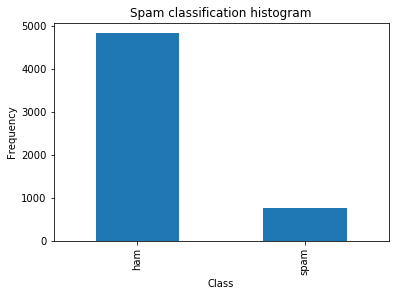

In [437]:
count_classes = pd.value_counts(data['class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Spam classification histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

13.4% of the examples are Spam while rest 86.6% examples are ham or actual messages. This is an example of skewed or imbalanced dataset.

In [438]:
# convert classes to 1 if Spam and 0 if not
data['class'] = np.where(data['class']=='spam',1,0)
X = data['text']
y = data['class']

In [439]:
from sklearn.model_selection import train_test_split
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [440]:
X_train.shape

(3900,)

# Data Exploration

In order to find which are the most commonly used words for spam and regular messages let's plot their wordcloud representations.

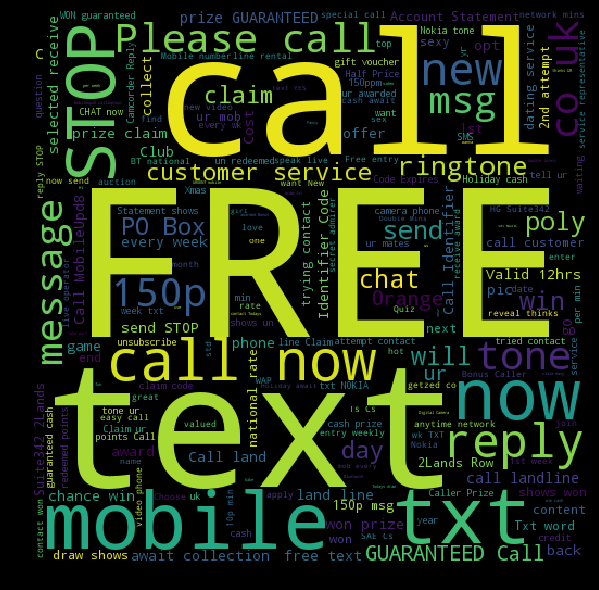

In [441]:
from wordcloud import WordCloud
# visualizing the spam words using wordcloud
spam_words = ''.join(list(data[data['class']==1]['text']))
spam_word_cloud = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

As expected spam messages mostly contain words like 'Free', 'text', 'call', 'mobile', 'prize clain', 'please call' etc

Now, lets look at the wordcloud representation of ham messages

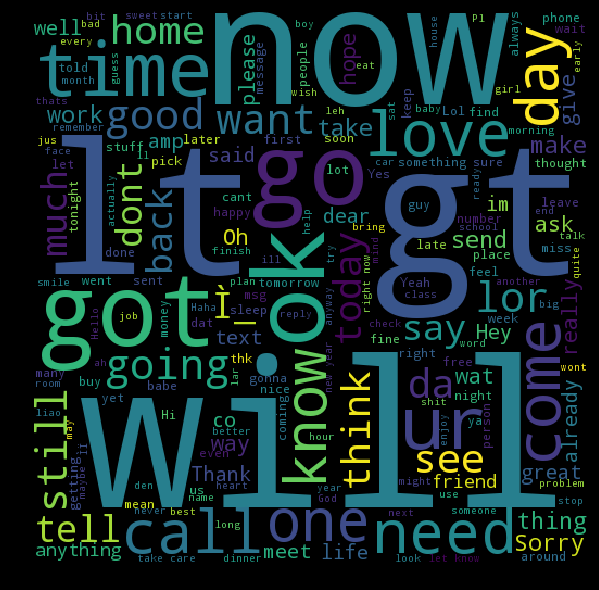

In [442]:
not_spam_words = ''.join(list(data[data['class']==0]['text']))
not_spam_word_cloud = WordCloud(width=512, height=512).generate(not_spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(not_spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Let's see if there's a significant difference between the average of lengths of document for a spam and ham.

**Average Length of Document**

In [443]:
spam_data = data[data['class'] == 1]
not_spam_data = data[data['class'] == 0]

spam_avg_doc_len = spam_data['text'].str.len().mean()
not_spam_avg_doc_len = not_spam_data['text'].str.len().mean()

print 'Average length of documents for spam:',spam_avg_doc_len
print 'Average length of documents for ham:',not_spam_avg_doc_len

Average length of documents for spam: 138.866131191
Average length of documents for ham: 71.023626943


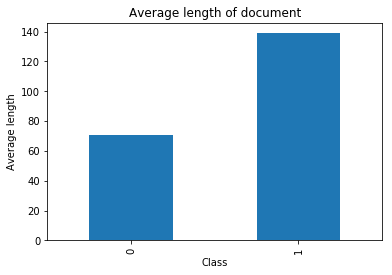

In [448]:
avg_doc_len = pd.DataFrame([not_spam_avg_doc_len, spam_avg_doc_len])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average length of document")
plt.xlabel("Class")
plt.ylabel("Average length")

Therefore, we can conclude that this is an important feature and should be considered for building our classifier. We can also observe that spam documents are more verbose that not spam documents.

**Average number of digits per document**

Since, we saw that 'prize claim' and 'call' were popular words used for spam documents, let's see if there is a significant difference between the average no. of digits occuring in spam documents vs not spam documents.

In [445]:
spam_avg_digits_per_doc = spam_data['text'].str.count(r'\d').mean()
not_spam_avg_digits_per_doc = not_spam_data['text'].str.count(r'\d').mean()

print 'Average no. of digits per document for spam:',spam_avg_digits_per_doc
print 'Average no. of digits per document for not spam:',not_spam_avg_digits_per_doc

Average no. of digits per document for spam: 15.7590361446
Average no. of digits per document for not spam: 0.299274611399


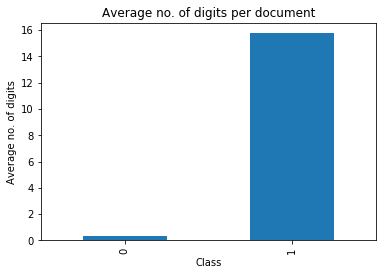

In [447]:
avg_doc_len = pd.DataFrame([not_spam_avg_digits_per_doc, spam_avg_digits_per_doc])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average no. of digits per document")
plt.xlabel("Class")
plt.ylabel("Average no. of digits")

Therefore, we can conclude that number of digits per document is also an important feature for classification.

**Average number of non word characters**

Let's also check if average number of non-word characters (anything other than letters, digits) is significantly different for spam and not spam documents.

In [449]:
spam_avg_non_word_chars = spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()
not_spam_avg_non_word_chars = not_spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()

print 'Average no. of digits per document for spam:',spam_avg_non_word_chars
print 'Average no. of digits per document for not spam:',not_spam_avg_non_word_chars

Average no. of digits per document for spam: 24.5890227577
Average no. of digits per document for not spam: 14.3251813472


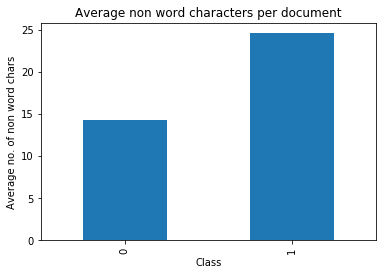

In [450]:
avg_doc_len = pd.DataFrame([not_spam_avg_non_word_chars, spam_avg_non_word_chars])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average non word characters per document")
plt.xlabel("Class")
plt.ylabel("Average no. of non word chars")

As, we see that spam messages tend to have more non word characters as compared to regular messages, we can add this as a feature as well.

# Data Preprocessing

Let's fit and transform training data using Tfidf Vectorizer with default parameters and find 20 features with smallest tf-idfs and 20 features with largest tf-idfs.

In [451]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
tfidf = TfidfVectorizer(min_df=3)
# tokenize and build vocab
tfidf.fit(X_train)
# encode the training data
idf = tfidf.idf_
X_train_v = tfidf.transform(X_train)
X_test_v = tfidf.transform(X_test)
tfidf_dict = dict(zip(tfidf.get_feature_names(), idf))
tfidf_df = pd.DataFrame.from_dict(tfidf_dict, orient='index').reset_index()
tfidf_df.columns=('token','idf')
tfidf_df = tfidf_df.sort_values(by='idf', ascending=False)


In [452]:
X_train_v.shape

(3900, 2190)

In [453]:
X_test_v.shape

(1672, 2190)

# Multinomial Naive Bayes Classifier 

As a baseline, let's build a classfier using Multinomial Naive Bayes algorithm without any additional fetaures.

In [454]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

clfrNB = MultinomialNB(alpha=0.1)
clfrNB.fit(X_train_v, y_train)
y_pred = clfrNB.predict(X_test_v)
print roc_auc_score(y_test, y_pred)

0.933101723092201


In [455]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [456]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[1451    2]
 [  29  190]]


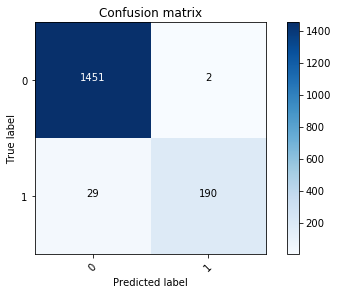

In [457]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [458]:
from sklearn.metrics import recall_score

print recall_score(y_test, y_pred)

0.867579908675799


# Feature Engineering

In [459]:
from scipy.sparse import csr_matrix, hstack

# returns sparse feature matrix with added feature. feature_to_add can also be a list of features.
def add_feature(X, feature_to_add):
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [460]:
def length_of_doc(X):
    return X.str.len()

def no_of_digits_per_doc(X):
    return X.str.count(r'\d')

def no_of_non_word_chars(X):
    return X.str.count(r'[^a-zA-Z0-9-]+')

In [461]:
doc_len_train = length_of_doc(X_train)
doc_len_test =  length_of_doc(X_test)

digits_per_doc_train = no_of_digits_per_doc(X_train)
digits_per_doc_test = no_of_digits_per_doc(X_test) 

non_word_chars_train = no_of_non_word_chars(X_train)
non_word_chars_test = no_of_non_word_chars(X_test)

X_train_v = add_feature(X_train_v, doc_len_train)
X_train_v = add_feature(X_train_v, digits_per_doc_train)
X_train_v = add_feature(X_train_v, non_word_chars_train)

X_test_v = add_feature(X_test_v, doc_len_test)
X_test_v = add_feature(X_test_v, digits_per_doc_test)
X_test_v = add_feature(X_test_v, non_word_chars_test)

In [462]:
X_train_v.shape

(3900, 2193)

In [463]:
X_test_v.shape

(1672, 2193)

In [464]:
clfrNB = MultinomialNB(alpha=0.1)
clfrNB.fit(X_train_v, y_train)
y_pred = clfrNB.predict(X_test_v)
print roc_auc_score(y_test, y_pred)

0.9540864908691512


Confusion matrix, without normalization
[[1439   14]
 [  18  201]]


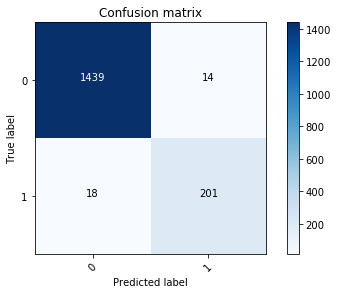

In [465]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [466]:
print recall_score(y_test, y_pred)

0.9178082191780822


# SVM Classifier

In [467]:
from sklearn.svm import SVC
clfsvm = SVC(C=10000)
clfsvm.fit(X_train_v, y_train)
y_pred = clfsvm.predict(X_test_v)

In [468]:
print roc_auc_score(y_pred, y_test)

0.9844932055205345


In [469]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[1448    5]
 [  11  208]]


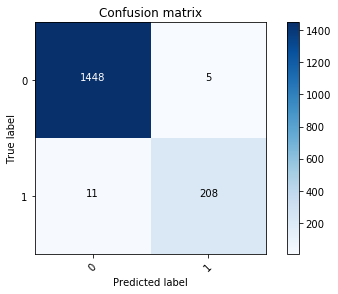

In [470]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [471]:
print recall_score(y_test, y_pred)

0.9497716894977168


Now, lets also try to see the results by using Logistic Regression

# Logistic Regression Classifier

In [472]:
from sklearn.linear_model import LogisticRegression

clflr = LogisticRegression(C=100)
clflr.fit(X_train_v, y_train)
y_pred = clflr.predict(X_test_v)

In [473]:
print roc_auc_score(y_pred, y_test)

0.9927979178532166


Confusion matrix, without normalization
[[1452    1]
 [  14  205]]


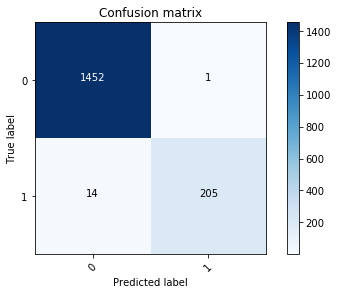

In [474]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [475]:
print recall_score(y_test, y_pred)

0.9360730593607306


# Evaluation and Conclusions

In case of spam detection problem, accuracy is not the best measure for evaluating our algorithm as the classes are imbalanced. In this case, our priority is to minimize the False Negatives i.e. an regular message being categorized as Spam. Therefore, our algorithm should have a high recall score = TP / TP + FN.

Let's compare our models below:

-  **Multinomial Naive Bayes without additional features**:  Accuracy = 93.30%, Recall = 86.65%
-  **Multinomial Naive Bayes with additional features**:     Accuracy = 95.40%, Recall = 91.78%
-  **SVM Classifier with additional features**:              Accuracy = 98.45%, Recall = 94.98%
-  **Logistic Regression with additional features**:         Accuracy = 99.28%, Recall = 93.60%

Although, Logisitic Regression model has the highest accuracy, the SVM classifier has the highest recall and slightly lower accuracy, therefore SVM should be the choice of classifier.